In [ ]:
#assignment 1

In [ ]:
import cv2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/Screenshot_13-1-2025_91016_.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def display_images(images, titles):
    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


rows, cols, _ = img.shape
translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))

In [ ]:

reflected_img = cv2.flip(img, 1)

In [ ]:

angle = 45
rotation_matrix = cv2.getRotationMatrix2D((cols // 2, rows // 2), angle, 1)
rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

In [ ]:

scaled_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

In [ ]:

cropped_img = img[50:200, 100:300]

In [ ]:

shear_x_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_x_img = cv2.warpAffine(img, shear_x_matrix, (int(cols * 1.5), rows))

shear_y_matrix = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_y_img = cv2.warpAffine(img, shear_y_matrix, (cols, int(rows * 1.5)))

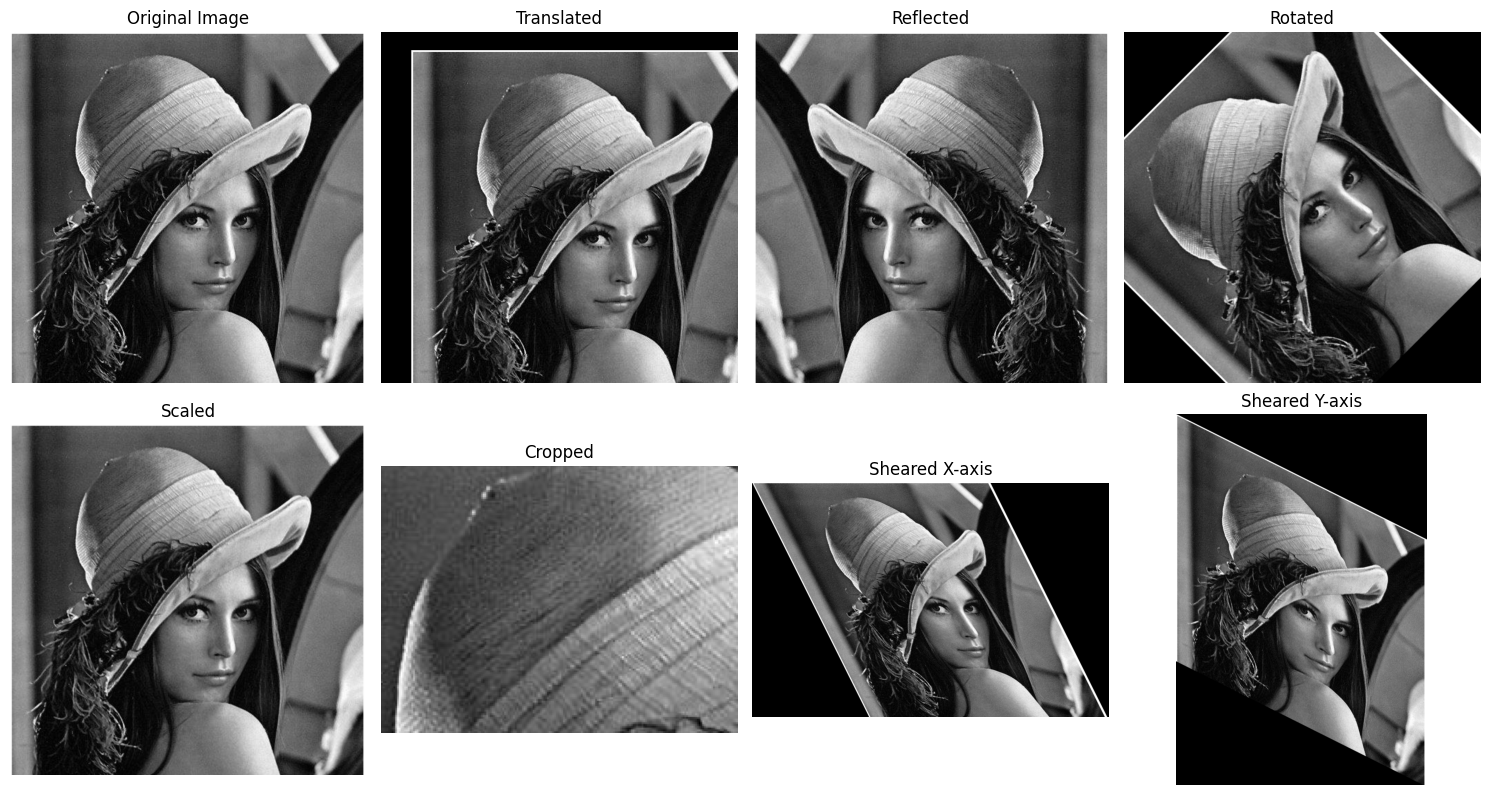

In [ ]:
titles = ['Original Image', 'Translated', 'Reflected', 'Rotated',
          'Scaled', 'Cropped', 'Sheared X-axis', 'Sheared Y-axis']
images = [img, translated_img, reflected_img, rotated_img, scaled_img, cropped_img, sheared_x_img, sheared_y_img]

display_images(images, titles)

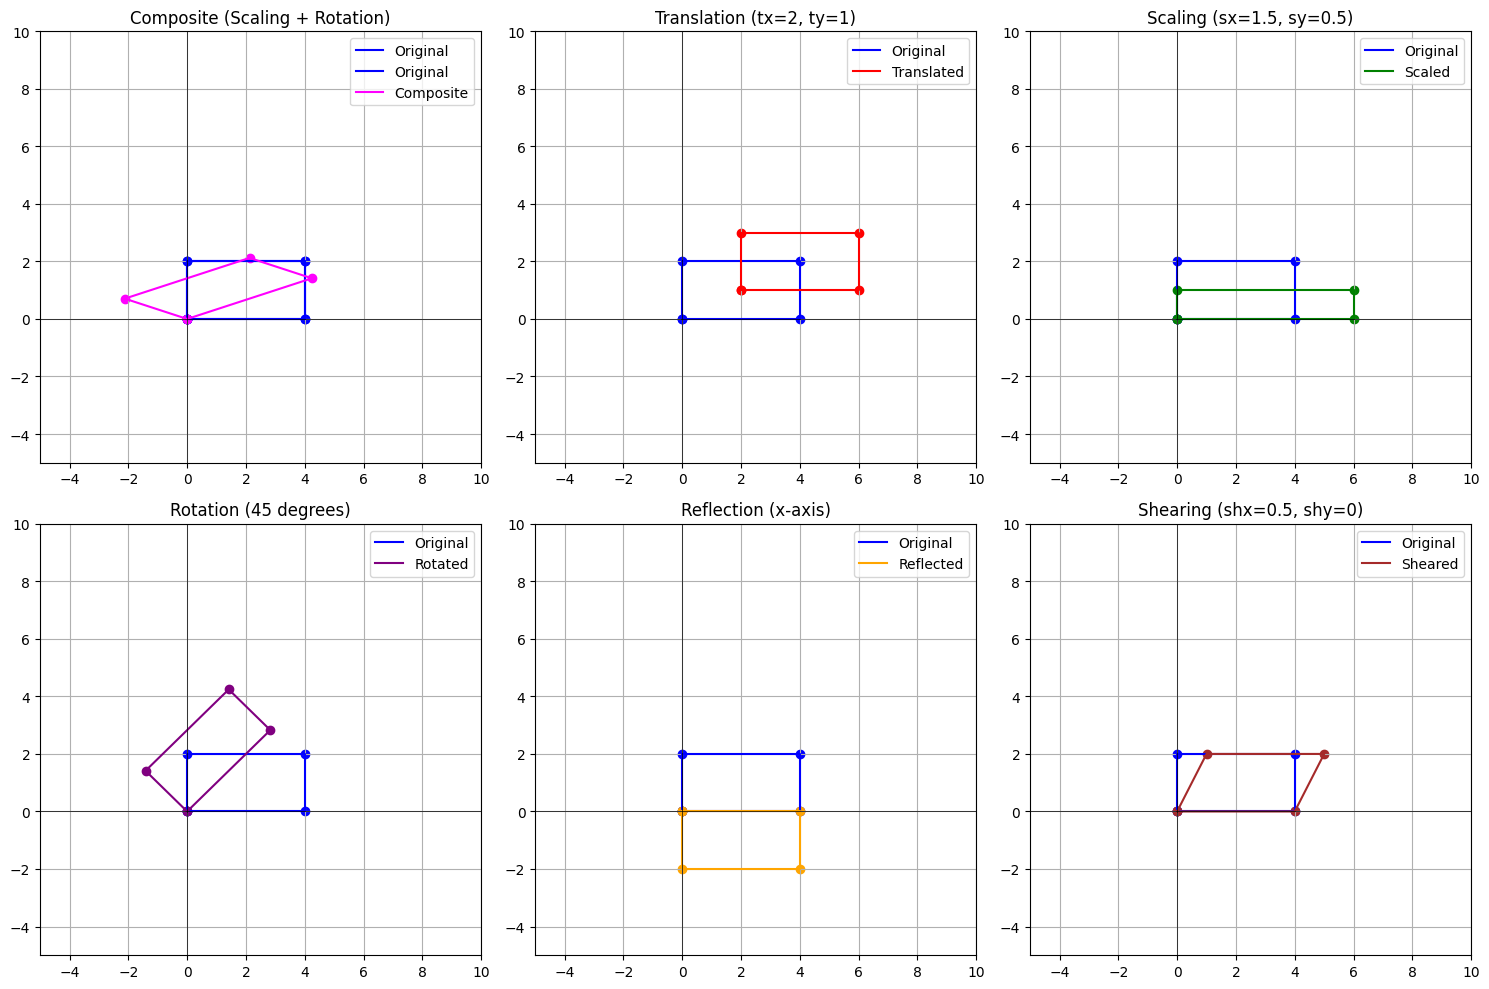

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_object(ax, points, color, label):

    points = np.vstack([points, points[0]])
    ax.plot(points[:, 0], points[:, 1], color=color, label=label)
    ax.scatter(points[:, 0], points[:, 1], color=color)

rectangle = np.array([[0, 0], [4, 0], [4, 2], [0, 2]])

def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    homogeneous_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = homogeneous_points @ translation_matrix.T
    return transformed_points[:, :2]

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    homogeneous_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = homogeneous_points @ scaling_matrix.T
    return transformed_points[:, :2]

def rotate(points, angle):
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                                 [np.sin(angle_rad),  np.cos(angle_rad), 0],
                                 [0, 0, 1]])
    homogeneous_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = homogeneous_points @ rotation_matrix.T
    return transformed_points[:, :2]

def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'.")
    homogeneous_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = homogeneous_points @ reflection_matrix.T
    return transformed_points[:, :2]

def shear(points, shx, shy):
    shear_matrix = np.array([[1, shx, 0],
                              [shy, 1, 0],
                              [0, 0, 1]])
    homogeneous_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = homogeneous_points @ shear_matrix.T
    return transformed_points[:, :2]

def composite_transformation(points, transformations):
    composite_matrix = np.eye(3)
    for matrix in transformations:
        composite_matrix = composite_matrix @ matrix
    homogeneous_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = homogeneous_points @ composite_matrix.T
    return transformed_points[:, :2]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()


plot_object(ax[0], rectangle, 'blue', 'Original')
ax[0].set_title("Original Object")


translated = translate(rectangle, tx=2, ty=1)
plot_object(ax[1], rectangle, 'blue', 'Original')
plot_object(ax[1], translated, 'red', 'Translated')
ax[1].set_title("Translation (tx=2, ty=1)")

scaled = scale(rectangle, sx=1.5, sy=0.5)
plot_object(ax[2], rectangle, 'blue', 'Original')
plot_object(ax[2], scaled, 'green', 'Scaled')
ax[2].set_title("Scaling (sx=1.5, sy=0.5)")

rotated = rotate(rectangle, angle=45)
plot_object(ax[3], rectangle, 'blue', 'Original')
plot_object(ax[3], rotated, 'purple', 'Rotated')
ax[3].set_title("Rotation (45 degrees)")

reflected = reflect(rectangle, axis='x')
plot_object(ax[4], rectangle, 'blue', 'Original')
plot_object(ax[4], reflected, 'orange', 'Reflected')
ax[4].set_title("Reflection (x-axis)")

sheared = shear(rectangle, shx=0.5, shy=0)
plot_object(ax[5], rectangle, 'blue', 'Original')
plot_object(ax[5], sheared, 'brown', 'Sheared')
ax[5].set_title("Shearing (shx=0.5, shy=0)")

scaling_matrix = np.array([[1.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])
rotation_matrix = np.array([[np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],
                             [np.sin(np.radians(45)),  np.cos(np.radians(45)), 0],
                             [0, 0, 1]])
composite = composite_transformation(rectangle, [scaling_matrix, rotation_matrix])
plot_object(ax[0], rectangle, 'blue', 'Original')
plot_object(ax[0], composite, 'magenta', 'Composite')
ax[0].set_title("Composite (Scaling + Rotation)")

for a in ax:
    a.legend()
    a.set_xlim(-5, 10)
    a.set_ylim(-5, 10)
    a.axhline(0, color='black', linewidth=0.5)
    a.axvline(0, color='black', linewidth=0.5)
    a.grid(True)

plt.tight_layout()
plt.show()
